# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

### Preliminaries

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import math
import matplotlib.pyplot as plt

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
len(data.columns)

65

In [5]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,occupbroad,workinschool,email,computerskills,specialskills,firstname,sex,race,h,l,call,city,kind,adid,fracblack,fracwhite,lmedhhinc,fracdropout,fraccolp,linc,col,expminreq,schoolreq,eoe,parent_sales,parent_emp,branch_sales,branch_emp,fed,fracblack_empzip,fracwhite_empzip,lmedhhinc_empzip,fracdropout_empzip,fraccolp_empzip,linc_empzip,manager,supervisor,secretary,offsupport,salesrep,retailsales,req,expreq,comreq,educreq,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,1,0,0,1,0,Allison,f,w,0.0,1.0,0.0,c,a,384.0,0.989360,0.005500,9.527484,0.274151,0.037662,8.706325,1.0,5,,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,6,1,1,1,0,Kristen,f,w,1.0,0.0,0.0,c,a,384.0,0.080736,0.888374,10.408828,0.233687,0.087285,9.532859,0.0,5,,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,1,1,0,1,0,Lakisha,f,b,0.0,1.0,0.0,c,a,384.0,0.104301,0.837370,10.466754,0.101335,0.591695,10.540329,1.0,5,,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,5,0,1,1,1,Latonya,f,b,1.0,0.0,0.0,c,a,384.0,0.336165,0.637370,10.431908,0.108848,0.406576,10.412141,0.0,5,,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,5,1,1,1,0,Carrie,f,w,1.0,0.0,0.0,c,a,385.0,0.397595,0.180196,9.876219,0.312873,0.030847,8.728264,0.0,some,,1.0,9.4,143.0,9.4,143.0,0.0,0.204764,0.727046,10.619399,0.070493,0.369903,10.007352,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 here</p>
</div>

In [6]:
w = data[data.race=='w']
b = data[data.race=='b']

In [7]:
data.describe()

,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,occupbroad,workinschool,email,computerskills,specialskills,h,l,call,adid,fracblack,fracwhite,lmedhhinc,fracdropout,fraccolp,linc,col,eoe,parent_sales,parent_emp,branch_sales,branch_emp,fed,fracblack_empzip,fracwhite_empzip,lmedhhinc_empzip,fracdropout_empzip,fraccolp_empzip,linc_empzip,manager,supervisor,secretary,offsupport,salesrep,retailsales,req,expreq,comreq,educreq,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind
count,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4784.000000,4784.000000,4784.000000,4784.000000,4784.000000,4784.000000,4870.000000,4870.000000,1672.000000,1722.000000,608.000000,658.000000,3102.000000,1918.000000,1918.000000,1908.000000,1918.000000,1918.000000,1918.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000
mean,3.618480,3.661396,7.842916,0.052772,0.411499,0.097125,0.448049,215.637782,3.481520,0.559548,0.479261,0.820534,0.328747,0.502259,0.497741,0.080493,651.777832,0.310831,0.542772,10.147275,0.185674,0.213816,9.550801,0.719507,0.291170,587.686035,2287.051025,196.050522,755.416992,0.114765,0.079096,0.843764,10.655662,0.101692,0.333872,10.031516,0.152156,0.077207,0.332854,0.118686,0.151129,0.167967,0.787269,0.435318,0.124846,0.106776,0.437166,0.072690,0.082957,0.030390,0.085010,0.213963,0.267762,0.154825,0.165092
std,0.714997,1.219126,5.044612,0.223601,0.492156,0.296159,0.497345,148.127551,2.038036,0.496492,0.499621,0.383782,0.469806,0.500051,0.500051,0.272079,388.690582,0.332473,0.329467,0.345780,0.081747,0.169305,0.557097,0.449287,0.454347,2907.629395,8902.843750,896.510864,1665.165039,0.318791,0.149742,0.182991,0.441931,0.071293,0.192012,0.567816,0.359208,0.266945,0.471274,0.323461,0.358204,0.373869,0.409275,0.495846,0.330582,0.308866,0.496083,0.259649,0.275854,0.171677,0.278932,0.410141,0.442847,0.361773,0.371308
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.004814,8.841738,0.000000,0.030847,8.507345,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005500,9.170247,0.000000,0.030847,8.662505,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,27.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,306.250000,0.045275,0.252164,9.965053,0.139711,0.092559,9.220489,0.000000,0.000000,12.975000,98.000000,13.000000,97.000000,0.000000,0.007125,0.824140,10.448976,0.047958,0.201971,9.691531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,6.000000,0.000000,0.000000,0.000000,0.000000,267.000000,4.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,647.000000,0.159950,0.571833,10.144078,0.190751,0.145053,9.438432,1.000000,0.000000,33.350000,220.000000,34.900000,200.000000,0.000000,0.017404,0.900727,10.666441,0.087009,0.288414,9.914428,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,4.000000,9.000000,0.000000,1.000000,0.000000,1.000000,313.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,979.750000,0.516854,0.873805,10.342871,0.238196,0.284315,9.668208,1.000000,1.000000,133.099998,700.000000,86.69999

In [8]:
w.describe()

,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,occupbroad,workinschool,email,computerskills,specialskills,h,l,call,adid,fracblack,fracwhite,lmedhhinc,fracdropout,fraccolp,linc,col,eoe,parent_sales,parent_emp,branch_sales,branch_emp,fed,fracblack_empzip,fracwhite_empzip,lmedhhinc_empzip,fracdropout_empzip,fraccolp_empzip,linc_empzip,manager,supervisor,secretary,offsupport,salesrep,retailsales,req,expreq,comreq,educreq,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind
count,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2390.000000,2390.000000,2390.000000,2390.000000,2390.000000,2390.000000,2435.000000,2435.000000,836.000000,861.000000,304.000000,329.000000,1551.000000,959.000000,959.000000,954.000000,959.000000,959.000000,959.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000
mean,3.620945,3.664476,7.856263,0.054209,0.408624,0.092402,0.450103,214.530595,3.475154,0.558111,0.478850,0.808624,0.330185,0.502259,0.497741,0.096509,651.777832,0.308440,0.545214,10.151346,0.186026,0.214998,9.554613,0.716222,0.291170,587.686462,2287.051514,196.050644,755.416992,0.114765,0.079096,0.843762,10.655683,0.101692,0.333873,10.031487,0.152361,0.077207,0.332649,0.118686,0.151129,0.167967,0.787269,0.435318,0.124846,0.106776,0.436961,0.072690,0.082957,0.030390,0.085010,0.213963,0.267762,0.154825,0.165092
std,0.696609,1.219345,5.079228,0.226477,0.491681,0.289653,0.497606,148.255302,2.033334,0.496714,0.499655,0.393465,0.470376,0.500094,0.500094,0.295346,388.730621,0.331148,0.327773,0.348334,0.081844,0.170674,0.561307,0.450925,0.454394,2908.499268,8905.437500,897.250305,1666.432129,0.318839,0.149781,0.183038,0.442047,0.071311,0.192062,0.567964,0.359446,0.266977,0.471258,0.323483,0.358247,0.373912,0.409325,0.495905,0.330608,0.308889,0.496116,0.259681,0.275874,0.171693,0.278955,0.410183,0.442879,0.361809,0.371337
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.004814,8.841738,0.000000,0.030847,8.507345,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005500,9.170247,0.000000,0.030847,8.662505,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,27.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,306.500000,0.045275,0.271449,9.967448,0.139843,0.092559,9.220489,0.000000,0.000000,12.975000,98.000000,13.000000,97.000000,0.000000,0.007176,0.824140,10.449923,0.047958,0.201971,9.691531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,6.000000,0.000000,0.000000,0.000000,0.000000,267.000000,4.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,647.000000,0.159950,0.571833,10.217824,0.190751,0.144759,9.446835,1.000000,0.000000,33.350000,220.000000,34.900000,200.000000,0.000000,0.017404,0.900727,10.666441,0.087009,0.288414,9.914428,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,4.000000,9.000000,0.000000,1.000000,0.000000,1.000000,313.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,979.500000,0.512182,0.873805,10.342871,0.238196,0.288013,9.718663,1.000000,1.000000,133.099998,700.000000,86.699997,500.00

In [9]:
b.describe()

,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,occupbroad,workinschool,email,computerskills,specialskills,h,l,call,adid,fracblack,fracwhite,lmedhhinc,fracdropout,fraccolp,linc,col,eoe,parent_sales,parent_emp,branch_sales,branch_emp,fed,fracblack_empzip,fracwhite_empzip,lmedhhinc_empzip,fracdropout_empzip,fraccolp_empzip,linc_empzip,manager,supervisor,secretary,offsupport,salesrep,retailsales,req,expreq,comreq,educreq,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind
count,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2435.000000,2435.000000,836.000000,861.000000,304.000000,329.000000,1551.000000,959.000000,959.000000,954.000000,959.000000,959.000000,959.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000
mean,3.616016,3.658316,7.829569,0.051335,0.414374,0.101848,0.445996,216.744969,3.487885,0.560986,0.479671,0.832444,0.327310,0.502259,0.497741,0.064476,651.777832,0.313215,0.540330,10.143031,0.185319,0.212639,9.547048,0.722793,0.291170,587.686462,2287.051514,196.050644,755.416992,0.114765,0.079096,0.843762,10.655683,0.101692,0.333873,10.031487,0.151951,0.077207,0.333060,0.118686,0.151129,0.167967,0.787269,0.435318,0.124846,0.106776,0.437372,0.072690,0.082957,0.030390,0.085010,0.213963,0.267762,0.154825,0.165092
std,0.733060,1.219150,5.010764,0.220725,0.492715,0.302511,0.497177,148.021857,2.043125,0.496369,0.499689,0.373549,0.469328,0.500094,0.500094,0.245649,388.730621,0.333842,0.331199,0.343230,0.081666,0.167953,0.552953,0.447712,0.454394,2908.499268,8905.437500,897.250305,1666.432129,0.318839,0.149781,0.183038,0.442047,0.071311,0.192062,0.567964,0.359048,0.266977,0.471407,0.323483,0.358247,0.373912,0.409325,0.495905,0.330608,0.308889,0.496160,0.259681,0.275874,0.171693,0.278955,0.410183,0.442879,0.361809,0.371337
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.004814,8.841738,0.000000,0.030847,8.507345,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005500,9.170247,0.000000,0.030847,8.662505,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,27.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,306.500000,0.045275,0.241399,9.965053,0.139711,0.092559,9.220489,0.000000,0.000000,12.975000,98.000000,13.000000,97.000000,0.000000,0.007176,0.824140,10.449923,0.047958,0.201971,9.691531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,6.000000,0.000000,0.000000,0.000000,0.000000,267.000000,4.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,647.000000,0.159950,0.571833,10.144078,0.190751,0.145053,9.422949,1.000000,0.000000,33.350000,220.000000,34.900000,200.000000,0.000000,0.017404,0.900727,10.666441,0.087009,0.288414,9.914428,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,4.000000,9.000000,0.000000,1.000000,0.000000,1.000000,313.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,979.500000,0.530870,0.873805,10.342871,0.238196,0.284315,9.668208,1.000000,1.000000,133.099998,700.000000,86.699997,500.00

## 1. What test is appropriate for this problem? Does CLT apply?



In [10]:
n_w, n_b, n_a = len(w), len(b), len(data.call)

p_w, p_b, p_a = w.call.mean(), b.call.mean(), data.call.mean()

call_w, call_b, call_a = w.call.sum(), b.call.sum(), data.call.sum()

print('The number of résumés with white-sounding names is: %i. \n\
The number of résumés with black-sounding names is: %i. \n\
The total number of résumés is: %i.' % (n_w, n_b, n_a))


print('The proportion of résumés with white-sounding names which received calls is: %.4f.\n\
The proportion of résumés with black-sounding names which received calls is: %.4f.\n\
The proportion of all résumés which received calls is: %.4f.' % (p_w, p_b, p_a))

print('The number of résumés with white-sounding names which received calls is: %i.\n\
The number of résumés with black-sounding names which received calls is: %i.\n\
The number of all résumés which received calls is: %i.' % (call_w, call_b, call_a))

print('The ratio of the proportion of résumés with white-sounding names which received calls \
to the proportion of résumés with black-sounding names which received calls is %.4f' % (p_w/p_b))

The number of résumés with white-sounding names is: 2435. 
The number of résumés with black-sounding names is: 2435. 
The total number of résumés is: 4870.
The proportion of résumés with white-sounding names which received calls is: 0.0965.
The proportion of résumés with black-sounding names which received calls is: 0.0645.
The proportion of all résumés which received calls is: 0.0805.
The number of résumés with white-sounding names which received calls is: 235.
The number of résumés with black-sounding names which received calls is: 157.
The number of all résumés which received calls is: 392.
The ratio of the proportion of résumés with white-sounding names which received calls to the proportion of résumés with black-sounding names which received calls is 1.4968


Denote the sample sizes, $n_w = n_b = 2435$, $n = 4870$,

the sample proportions, $\mu_w = \hat{p}_w = 0.0965$, $\mu_b = \hat{p}_b = 0.0645$, $\mu = \hat{p} = 0.0805$,

the number of calls, $n_w * \hat{p}_w = 235$, $n_b * \hat{p}_b = 157$, $n * \hat{p} = 392$,

and the ratio, $\hat p_w / \hat p_b = 1.4968 = 149.68\%$.

#### The CLT Applies

The conditions for inference on a proportion are met:

**Randomness**: We will presume the researchers chose a random sample.

**Normality**: Since the number of successes (call) and the number of failures (no call) are greater than 10 for each population, the sampling distribution is approximately normal.

**Independence**: The sample sizes are far fewer than 10% of the population.


#### Appropriate Tests

For the *bootstrap* approach, an appropriate test is a permutation test. This will in fact test whether the random variables $\hat p_w$ and $\hat p_b$ are independent and identically distibuted (i.i.d.) random variables. We could also 

For the *frequentist* approach, the appropriate test is a (two-tail) two-sample $z$-test for proportions.

## 2. What are the null and alternate hypotheses?

Since we are comparing two proportions with approximately normal sampling distributions, we can perform a hypothesis test on the difference of proportions. Our hypotheses are

$H_0$: $p_w = p_b$ (The population proportions are equal). $p_w - p_b = 0$

$H_1$: $p_w \neq p_b$ (The population proportions are not equal). $p_w - p_b \neq 0$

The sampling distribution for $\hat{p}_w - \hat{p}_b$ is approximately normal so we compute the $z$-statistic for the sampling distribution of the difference in proportions. Set the level of significance $\alpha  = 0.05$.

We will compute the $p$-value $p = P(\hat{p}_w = \hat{p}_b | H_0)$



In [11]:
alpha = 0.05

## 3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.

### Frequentist Approach

The standard errors of $\hat p_w$ and $\hat p_b$ are obtained by using $\hat p_w$ and $\hat p_b$ as estimates for $p_w$ and $p_b$:
$$ \sigma_{\hat p_w} \approx \sqrt{\frac{\hat{p}_w * (1- \hat{p}_w)}{n_w}} \qquad \text{and} \qquad \sigma_{\hat p_b} \approx \sqrt{\frac{\hat{p}_b * (1- \hat{p}_b)}{n_b}} $$
Their values are:

In [12]:
std_err_w = math.sqrt((p_w * (1-p_w)) / n_w)
std_err_b = math.sqrt((p_b * (1-p_b)) / n_b)

print('The standard error for the proportion of résumés with white-sounding names is %f\n\
The standard error for the proportion of résumés with black-sounding names is %f.' % (std_err_w, std_err_b))

The standard error for the proportion of résumés with white-sounding names is 0.005984
The standard error for the proportion of résumés with black-sounding names is 0.004977.


In [13]:
p_diff = p_w - p_b
std_err_diff = math.sqrt(std_err_w ** 2 + std_err_b ** 2)

print('The difference in sample proportions is %f' % p_diff)
print('The standard error of the sampling distribution of the difference in proportions is %f' % std_err_diff)


The difference in sample proportions is 0.032033
The standard error of the sampling distribution of the difference in proportions is 0.007783


$$\mu_{\hat p_w - \hat p_b} = \hat p_w - \hat p_b = 0.032033$$

$$\sigma_{\hat p_w - \hat p_b} = \sqrt{\sigma_{\hat p_w}^2 + \sigma_{\hat p_b}^2} = 0.007783$$

In [14]:
z_stat = p_diff / std_err_diff

p_value = 2 * stats.norm.sf(z_stat) # Two-tail

print('The z-statistic is %f and the p_value is %f' % (z_stat, p_value))

if p_value > alpha:
    print('Fail to reject H_0.')
else:
    print('Reject H_0.')

The z-statistic is 4.115551 and the p_value is 0.000039
Reject H_0.


In [15]:
moe95 = stats.norm.ppf(.95) * std_err_diff
moe99 = stats.norm.ppf(.99) * std_err_diff

print('The margin of error for a 95%% confidence interval is %f' % moe95)
print('The margin of error for a 99%% confidence interval is %f' % moe99)

conf95 = [p_diff - moe95, p_diff + moe95]
conf99 = [p_diff - moe99, p_diff + moe99]

print('The 95%% confidence interval is %f – %f.' % tuple(conf95))
print('The 99%% confidence interval is %f – %f.' % tuple(conf99))

The margin of error for a 95% confidence interval is 0.012803
The margin of error for a 99% confidence interval is 0.018107
The 95% confidence interval is 0.019230 – 0.044835.
The 99% confidence interval is 0.013926 – 0.050140.


These are the confidence intervals about $\hat p_w - \hat p_b$. Note that neither includes 0. In fact, the $p$-value we found demonstrates that if $\mu_w = \mu_b$, then the probability of picking a sample with a difference between $\hat p_w$ and $\hat p_b$ of 0.032 is not merely less than 1%, it is 0.0039%.

### Bootstrap Approach

We in fact test the more general hypothesis that the distribution of calls to white applicants is the same as the distribution of calls to black applicants with a permutation sample. This hypothesis implies $H_0$ (though the converse is not necessarily true). So we in fact presume $\hat p_w$ and $\hat p_b$ are i.i.d. random variables for the following.

In [16]:
# Functions from DataCamp course:

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y



def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

In [17]:
w_c = np.array(w.call)
b_c = np.array(b.call)
bs_reps = draw_perm_reps(w_c, b_c, diff_of_means, 10000)

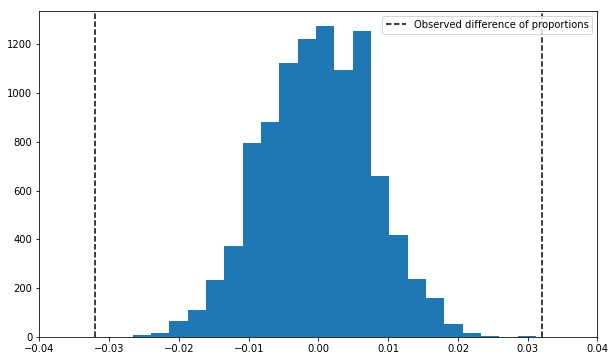

In [18]:
_ = plt.figure(figsize=(10,6))
_ = plt.hist(bs_reps, bins=25)
_ = plt.axvline(p_diff, linestyle='--', color='k', label='Observed difference of proportions')
_ = plt.axvline(-p_diff, linestyle='--', color='k')
_ = plt.xlim(-0.04, 0.04)
_ = plt.legend()

In [19]:
p_value = np.sum(abs(bs_reps) > p_diff) / len(bs_reps)
p_value

0.0001

In [20]:
conf95 = np.percentile(bs_reps, [2.5, 97.5]) + p_diff
conf99 = np.percentile(bs_reps, [0.5, 99.5]) + p_diff

moe95 = (conf95[1] - p_diff) / 2
moe99 = (conf99[1] - p_diff) / 2

print('The margin of error for a 95%% confidence interval is %f' % moe95)
print('The margin of error for a 99%% confidence interval is %f' % moe99)
print('The 95%% confidence interval is %f – %f.' % tuple(conf95))
print('The 99%% confidence interval is %f – %f.' % tuple(conf99))

The margin of error for a 95% confidence interval is 0.007392
The margin of error for a 99% confidence interval is 0.009856
The 95% confidence interval is 0.016427 – 0.046817.
The 99% confidence interval is 0.011499 – 0.051745.


In [21]:
print('The p_value is %f' %(p_value))

if p_value > alpha:
    print('Fail to reject H_0.')
else:
    print('Reject H_0.')

The p_value is 0.000100
Reject H_0.


## 4. Write a story describing the statistical significance in the context or the original problem.

In this sample, the difference between the proportion of calls to white applicants, $\hat p_w = 0.0965 = 9.65\%$, and the proportion of calls to black applicants, $\hat p_b = 0.0645 = 6.45\%$, is $\hat p_w - \hat p_b = 0.0320 = 3.20\%$.
Note that, in this sample,the ratio of proportions is $\hat p_w / \hat p_b = 1.4968$, or that the proportion of calls to white applicants is 49.68% more than the proportion of calls to black applicants.

At a level of significance of $\alpha = 0.05$, we have sufficient evidence to reject the null hypothesis, that is, we reject the hypothesis that there is no difference between the proportion of calls to white applicants and the proportion of calls to black applicants in the population. We adopt the hypothesis that there is a difference in call proportions. The $p$-value we found via the frequentist test, $p = 0.000039$, allows us to state that, were the population proportion of returned calls the same between white and black applicants, there is only a 0.0039% probability that the observed difference $\hat p_w - \hat p_b$ is due to our choice of sample. Further, this $p$-value implies that we could adopt the alternative hypothesis from the one-tail test, that $p_w > p_b$, in other words, that the proportion of calls to white applicants is greater than the proportion of calls to black applicants in the population.

## 5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

No. The difference in proportions between callbacks to white-sounding names and callbacks to black-sounding names is certainly striking in magnitude and clearly significant. But to determine which factor is the most important factor in callback success we would have to at least examine some of the factors exhibited in rest of the data outside the `race` and `call` columns. As a brief start to the investigation of this question, we may look at the ratio between other proportions for these two samples to check if any other feature might be correlated to `race`.

In [22]:
# ratio
(w.mean() / b.mean()).sort_values(ascending=False)

call                  1.496815
honors                1.056000
fraccolp              1.011093
empholes              1.009208
fracwhite             1.009038
specialskills         1.008783
fracdropout           1.003813
yearsexp              1.003409
manager               1.002703
ofjobs                1.001684
education             1.001363
lmedhhinc             1.000820
linc                  1.000793
fracwhite_empzip      1.000000
adid                  1.000000
l                     1.000000
eoe                   1.000000
parent_sales          1.000000
h                     1.000000
parent_emp            1.000000
othservice            1.000000
branch_emp            1.000000
fed                   1.000000
missind               1.000000
educreq               1.000000
req                   1.000000
busservice            1.000000
trade                 1.000000
bankreal              1.000000
transcom              1.000000
manuf                 1.000000
orgreq                1.000000
lmedhhin

In [23]:
# difference
(w.mean() - b.mean()).sort_values(ascending=False)

call                  3.203285e-02
yearsexp              2.669382e-02
lmedhhinc             8.315086e-03
linc                  7.565498e-03
ofjobs                6.160259e-03
education             4.928112e-03
fracwhite             4.883468e-03
empholes              4.106760e-03
specialskills         2.874762e-03
honors                2.874743e-03
fraccolp              2.358869e-03
fracdropout           7.066429e-04
manager               4.106760e-04
h                     0.000000e+00
l                     0.000000e+00
adid                  0.000000e+00
fracwhite_empzip      0.000000e+00
eoe                   0.000000e+00
parent_sales          0.000000e+00
parent_emp            0.000000e+00
othservice            0.000000e+00
branch_emp            0.000000e+00
fed                   0.000000e+00
missind               0.000000e+00
educreq               0.000000e+00
req                   0.000000e+00
busservice            0.000000e+00
trade                 0.000000e+00
bankreal            

So we may want to investigate whether `honors` or `military` and perhaps other columns are correlated to `race` (or each other), perhaps using a covariance matrix. With a sense of the relationship between these factors, we would be in a better position to conclude whether `race` influences `call` or if there is another factor(s) which influence both.

The above does not include columns with categorical data, e.g. `sex`. We might investigate whether gender, for example, is a factor in callbacks, in a similar analysis as we performed for `race`:

In [24]:
f = data[data.sex == 'f']
m = data[data.sex == 'm']

In [25]:
p_f = f.call.mean()
p_m = m.call.mean()
print('The proportion of callbacks to females is %.4f and the proportion of\
callbacks to males is %.4f' % (p_f, p_m))
print('The difference in callbacks between females and males is %.4f and the\
ratio of proportions in callbacks of females to males is %.4f' % (p_f - p_m, p_f / p_m))

The proportion of callbacks to females is 0.0825 and the proportion ofcallbacks to males is 0.0738
The difference in callbacks between females and males is 0.0086 and theratio of proportions in callbacks of females to males is 1.1171


In [26]:
std_err_f = math.sqrt((p_f * (1-p_f)) / len(f))
std_err_m = math.sqrt((p_m * (1-p_m)) / len(m))
std_err_diff_gender = math.sqrt(std_err_f ** 2 + std_err_m ** 2)
z_gender = (p_f - p_m) / (std_err_diff_gender)
p_value = 2 * stats.norm.sf(z_gender) # Two-tail

print('The z-statistic is %f and the p_value is %f' % (z_gender, p_value))

if p_value > alpha:
    print('Fail to reject H_0.')
else:
    print('Reject H_0.')

The z-statistic is 0.960214 and the p_value is 0.336948
Fail to reject H_0.


The difference in proportions of callbacks to females and callbacks to males is not statistically significant. However, we should investigate all available other factors before making any conclusions as to the most important factor.